### Hyperparameter tuning for LR, metric_for_refit=recall ,class_weight=default

In [33]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

 

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [36]:
#train
df=pd.read_csv("train.csv.zip")
X=df.drop(['ID_code','target'],axis=1)
Y=df['target']
del df;


In [37]:
#test_submission
df_subm=pd.read_csv("test.csv.zip")
X_subm=df_subm.drop('ID_code',axis=1)
del df_subm

In [38]:
search_param={
     'penalty' : ['l1', 'l2','elsticnet'],
    'C' : np.logspace(-4, 4, 20)
}

In [39]:
#parameter to choose from total 12*2*3*11 combination
search_param

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'penalty': ['l1', 'l2', 'elsticnet']}

In [41]:
clf=LogisticRegression()
model=RandomizedSearchCV(
    estimator=clf, param_distributions=search_param, 
    n_iter=100,
    scoring=['roc_auc','recall'],
    cv=5,
    refit='recall',
    n_jobs=1,
    random_state=314,
    verbose=1000)

In [ ]:

model.fit(X,Y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=1,
                   param_distributions={'C': ar...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [ ]:
model.best_params_

{'C': 206.913808111479, 'penalty': 'l2'}

In [ ]:
model.best_score_

0.2408696378768016

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
param=model.best_params_
clf=LogisticRegression(**param)
clf.fit(X_train,Y_train)

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.850772515756369
confusion matrix :
 [[142120   1802]
 [ 12190   3888]]
Precision  0.6833040421792619
Recall  0.24182112203010325


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8489245891166735
confusion matrix :
 [[35521   459]
 [ 3112   908]]
Precision  0.6642282370153622
Recall  0.22587064676616916


Getting kaggle score

---



---



---



In [7]:
clf=LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
clf.fit(X,Y)

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
test_score_subm=clf.predict_proba(X_subm)[:,1]
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/LR_refit_recall_class_weight_default.csv",index=False)

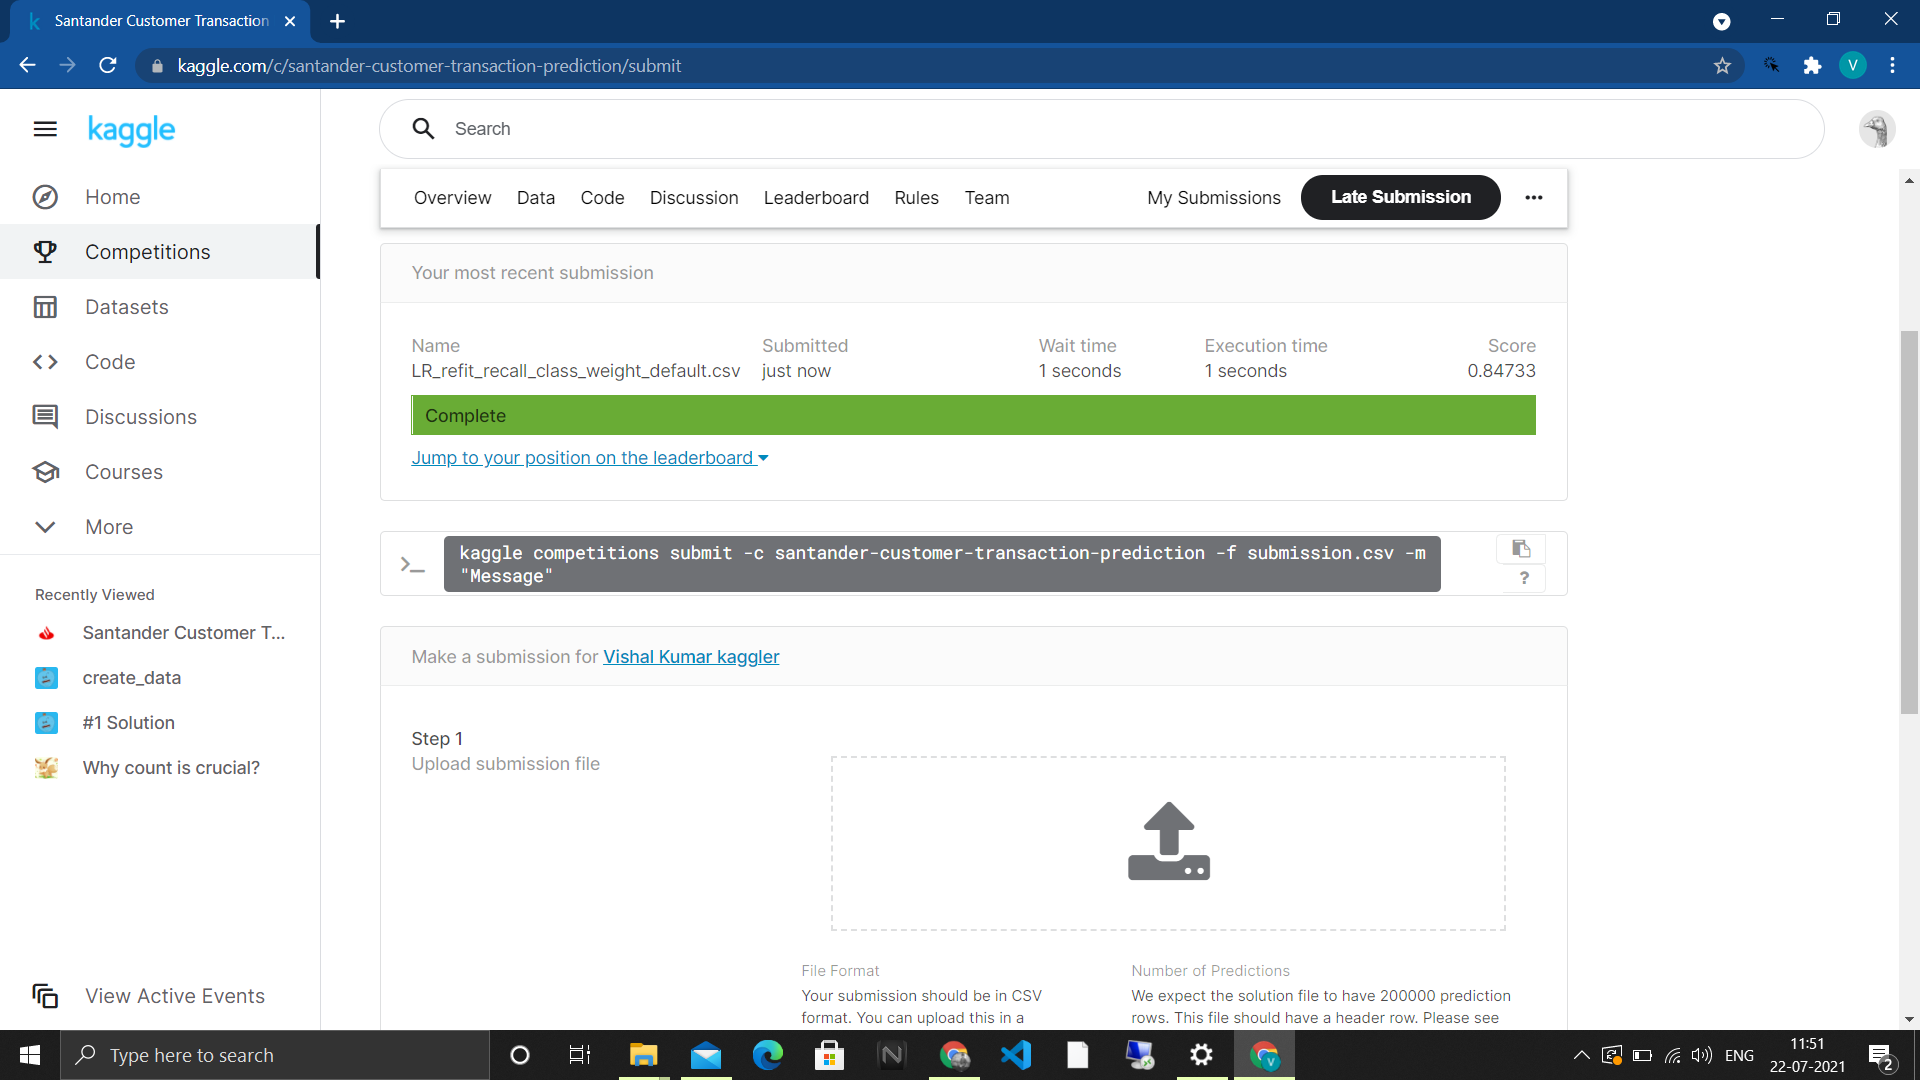

### Hyperparameter tuning for LR, metric_for_refit=auc ,class_weight=default

In [42]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [ ]:
#train
df=pd.read_csv("train.csv.zip")
X=df.drop(['ID_code','target'],axis=1)
Y=df['target']
del df;

# #test
# df_te=pd.read_csv("test.csv.zip")
# X_test=df_te.drop('ID_code',axis=1)
# del df_te


In [43]:
search_param={
     'penalty' : ['l1', 'l2','elsticnet'],
    'C' : np.logspace(-4, 4, 20)
}

In [44]:
#parameter to choose from total 12*2*3*11 combination
search_param

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'penalty': ['l1', 'l2', 'elsticnet']}

In [45]:
clf=LogisticRegression()
model=RandomizedSearchCV(
    estimator=clf, param_distributions=search_param, 
    n_iter=100,
    scoring=['roc_auc','recall'],
    cv=5,
    refit='roc_auc',
    n_jobs=1,
    random_state=314,
    verbose=1000)

In [46]:

model.fit(X,Y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=1,
                   param_distributions={'C': ar...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [47]:
model.best_score_

0.8484995217074873

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [49]:
param=model.best_params_
clf=LogisticRegression(**param)
clf.fit(X_train,Y_train)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Train metrics**

In [50]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8492138504920805
confusion matrix :
 [[141934   1988]
 [ 12060   4018]]
Precision  0.668997668997669
Recall  0.2499067048140316


**Test metrics**

In [51]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8474571140960014
confusion matrix :
 [[35470   510]
 [ 3076   944]]
Precision  0.6492434662998624
Recall  0.23482587064676616


Getting kaggle score

---



---



---



In [53]:
clf=LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
clf.fit(X,Y)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
test_score_subm=clf.predict_proba(X_subm)[:,1]
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/LR_refit_auc_class_weight_default.csv",index=False)

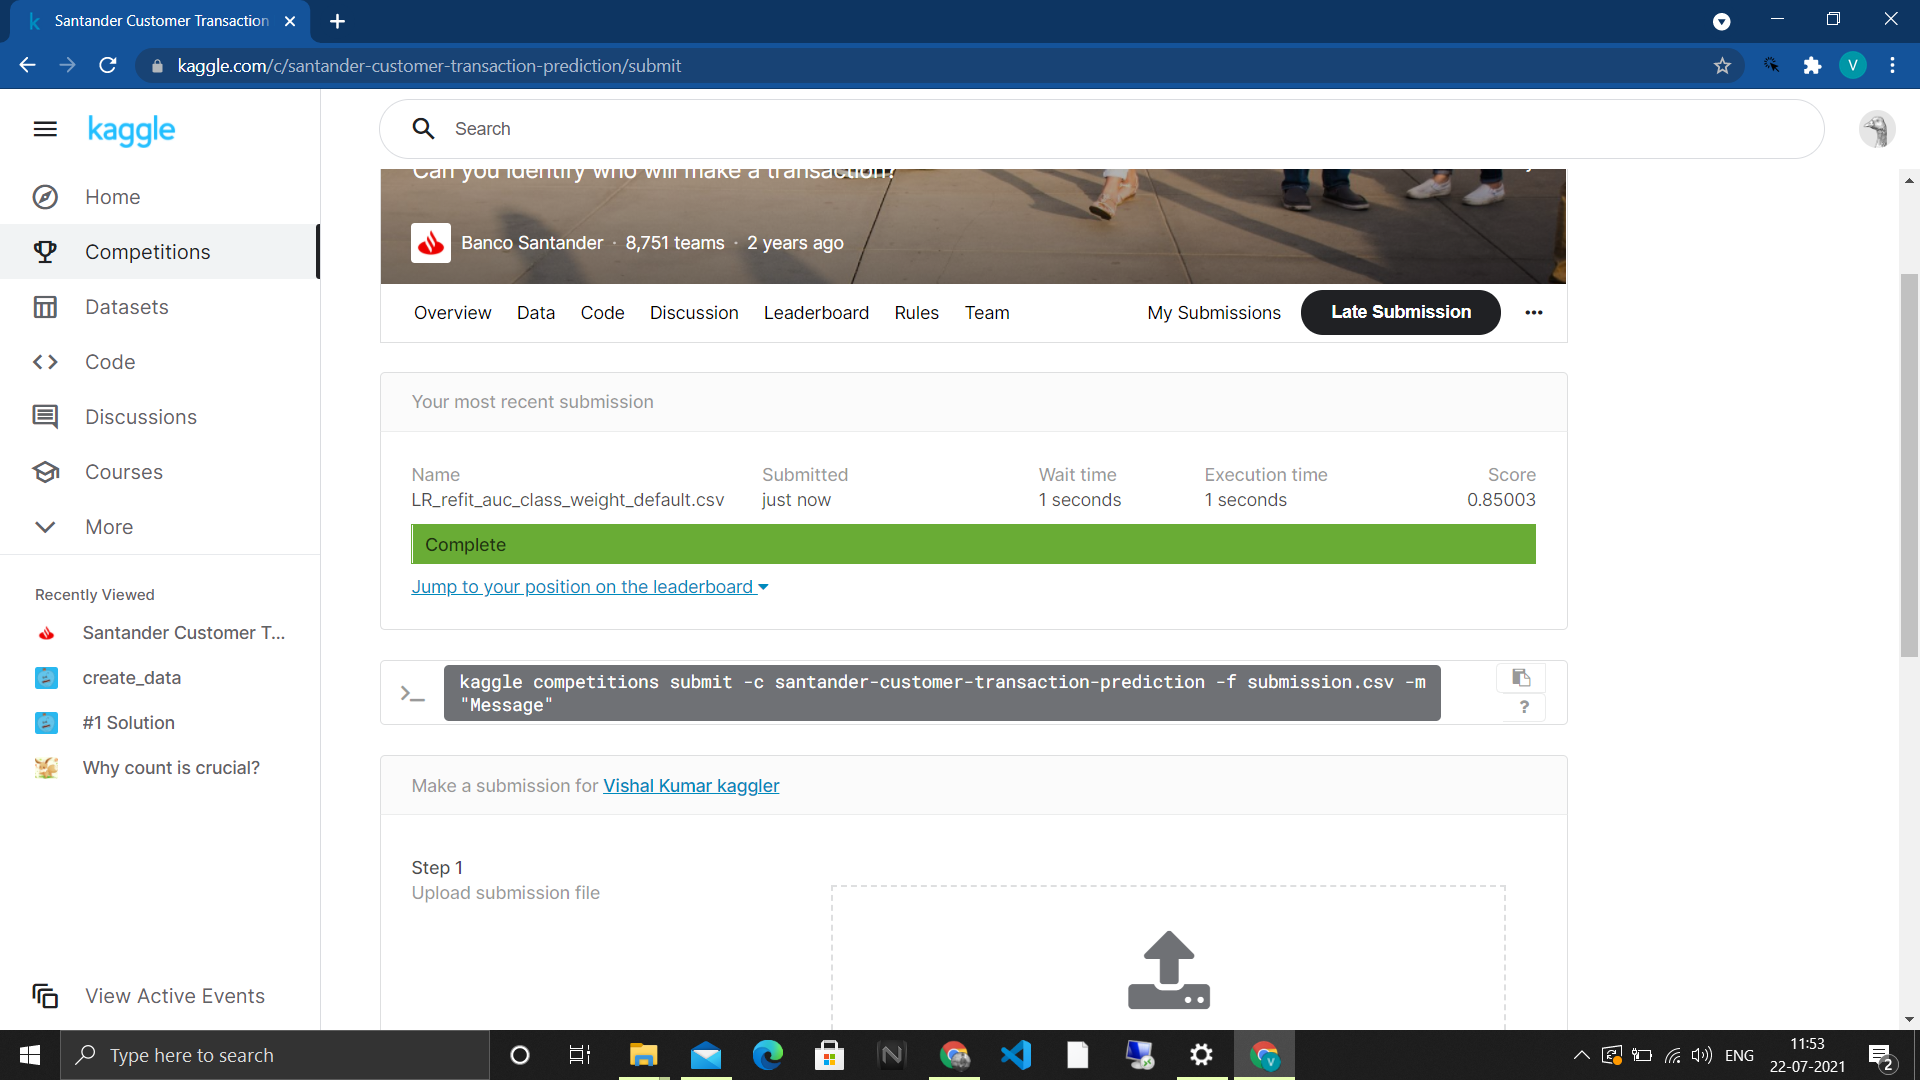

**Making weights balanced**

In [ ]:
param=model.best_params_
clf=LogisticRegression(**param,class_weight='balanced')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.004832930238571752, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8513298123455384
confusion matrix :
 [[111332  32590]
 [  3723  12355]]
Precision  0.27489153409722994
Recall  0.7684413484264212


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8489684429437029
confusion matrix :
 [[27883  8097]
 [  961  3059]]
Precision  0.2742022230190032
Recall  0.7609452736318408


Getting kaggle score

---



---



---



In [13]:
clf=LogisticRegression(C=0.004832930238571752, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
clf.fit(X,Y)

LogisticRegression(C=0.004832930238571752, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
test_score_subm=clf.predict_proba(X_subm)[:,1]
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/LR_refit_auc_class_weight_balanced_after_tuning.csv",index=False)

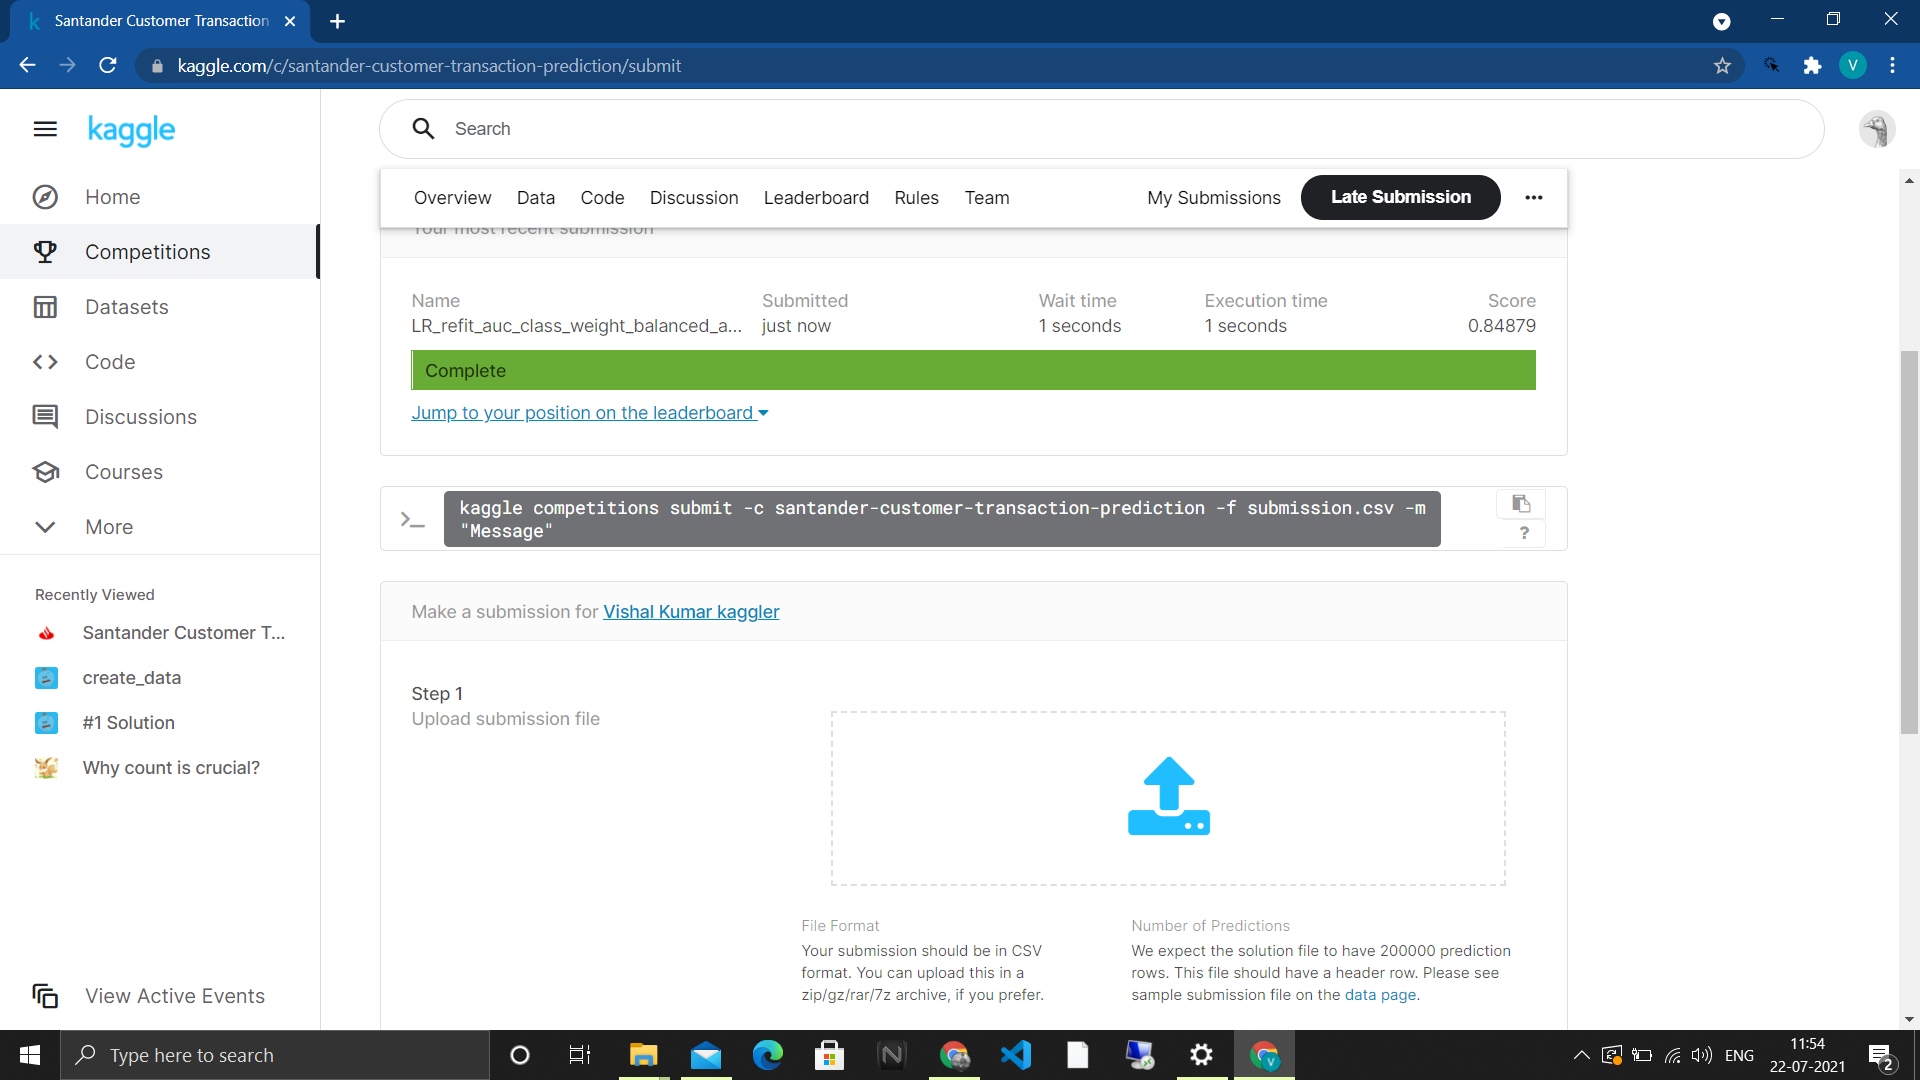

### Hyperparameter tuning for LR, metric_for_refit=auc ,class_weight=balanced

In [ ]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [ ]:
#train
df=pd.read_csv("train.csv.zip")
X=df.drop(['ID_code','target'],axis=1)
Y=df['target']
del df;

# #test
# df_te=pd.read_csv("test.csv.zip")
# X_test=df_te.drop('ID_code',axis=1)
# del df_te


In [ ]:
search_param={
     'penalty' : ['l1', 'l2','elsticnet'],
    'C' : np.logspace(-4, 4, 20)
}

In [ ]:
#parameter to choose from total 12*2*3*11 combination
search_param

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'penalty': ['l1', 'l2', 'elsticnet']}

In [ ]:
clf=LogisticRegression(class_weight='balanced')
model=RandomizedSearchCV(
    estimator=clf, param_distributions=search_param, 
    n_iter=100,
    scoring=['roc_auc','recall'],
    cv=5,
    refit='roc_auc',
    n_jobs=1,
    random_state=314,
    verbose=1000)

In [ ]:

model.fit(X,Y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=1,
                   param_distributions={...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
model.best_score_

0.8502186116223032

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
param=model.best_params_
clf=LogisticRegression(**param,class_weight='balanced')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.004832930238571752, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8514443281316088
confusion matrix :
 [[111555  32367]
 [  3750  12328]]
Precision  0.2758250363575344
Recall  0.7667620350789899


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8489773478355859
confusion matrix :
 [[27930  8050]
 [  960  3060]]
Precision  0.27542754275427545
Recall  0.7611940298507462


Getting kaggle score

---



---



---



In [16]:
clf=LogisticRegression(C=0.004832930238571752, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
clf.fit(X,Y)

LogisticRegression(C=0.004832930238571752, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
test_score_subm=clf.predict_proba(X_subm)[:,1]
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/LR_refit_auc_class_weight_balanced_before&after_tuning.csv",index=False)

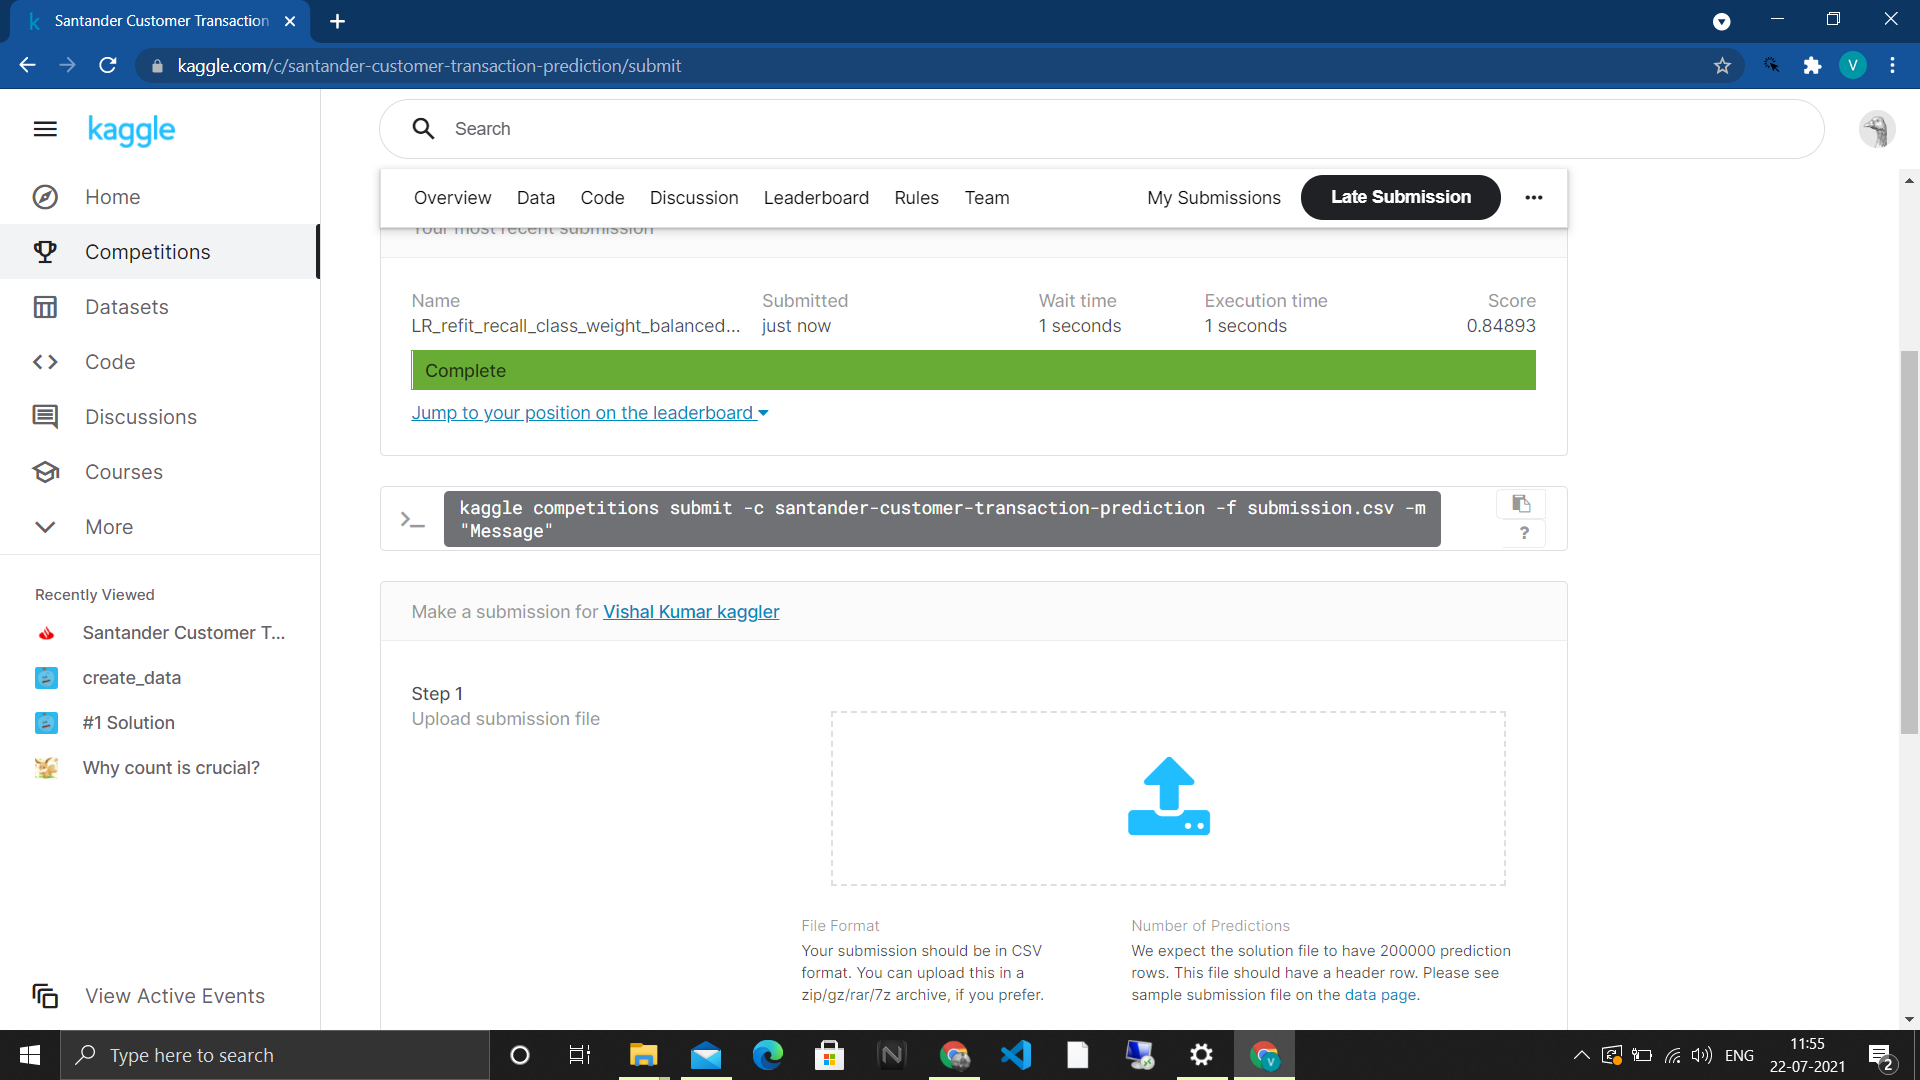

### Hyperparameter tuning for LR, metric_for_refit=recall ,class_weight=balanced

In [ ]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [ ]:
#train
df=pd.read_csv("train.csv.zip")
X=df.drop(['ID_code','target'],axis=1)
Y=df['target']
del df;

# #test
# df_te=pd.read_csv("test.csv.zip")
# X_test=df_te.drop('ID_code',axis=1)
# del df_te


In [ ]:
search_param={
     'penalty' : ['l1', 'l2','elsticnet'],
    'C' : np.logspace(-4, 4, 20)
}

In [ ]:
#parameter to choose from total 12*2*3*11 combination
search_param

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'penalty': ['l1', 'l2', 'elsticnet']}

In [ ]:
clf=LogisticRegression(class_weight='balanced')
model=RandomizedSearchCV(
    estimator=clf, param_distributions=search_param, 
    n_iter=100,
    scoring=['roc_auc','recall'],
    cv=5,
    refit='recall',
    n_jobs=1,
    random_state=314,
    verbose=1000)

In [ ]:

model.fit(X,Y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[CV] penalty=l1, C=0.0001 ............................................
[CV] .... penalty=l1, C=0.0001, recall=nan, roc_auc=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=1,
                   param_distributions={...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
model.best_score_

0.7688317803864481

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
param=model.best_params_
clf=LogisticRegression(**param,class_weight='balanced')
clf.fit(X_train,Y_train)

LogisticRegression(C=545.5594781168514, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8513827488922328
confusion matrix :
 [[111168  32754]
 [  3722  12356]]
Precision  0.273908224340501
Recall  0.7685035452170668


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8488646885085414
confusion matrix :
 [[27879  8101]
 [  950  3070]]
Precision  0.27481872706114047
Recall  0.763681592039801


Getting kaggle score

---



---



---



In [19]:
clf=LogisticRegression(C=545.5594781168514, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
clf.fit(X,Y)

LogisticRegression(C=545.5594781168514, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
test_score_subm=clf.predict_proba(X_subm)[:,1]
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/LR_refit_recall_class_weight_balanced_before&after_tuning.csv",index=False)

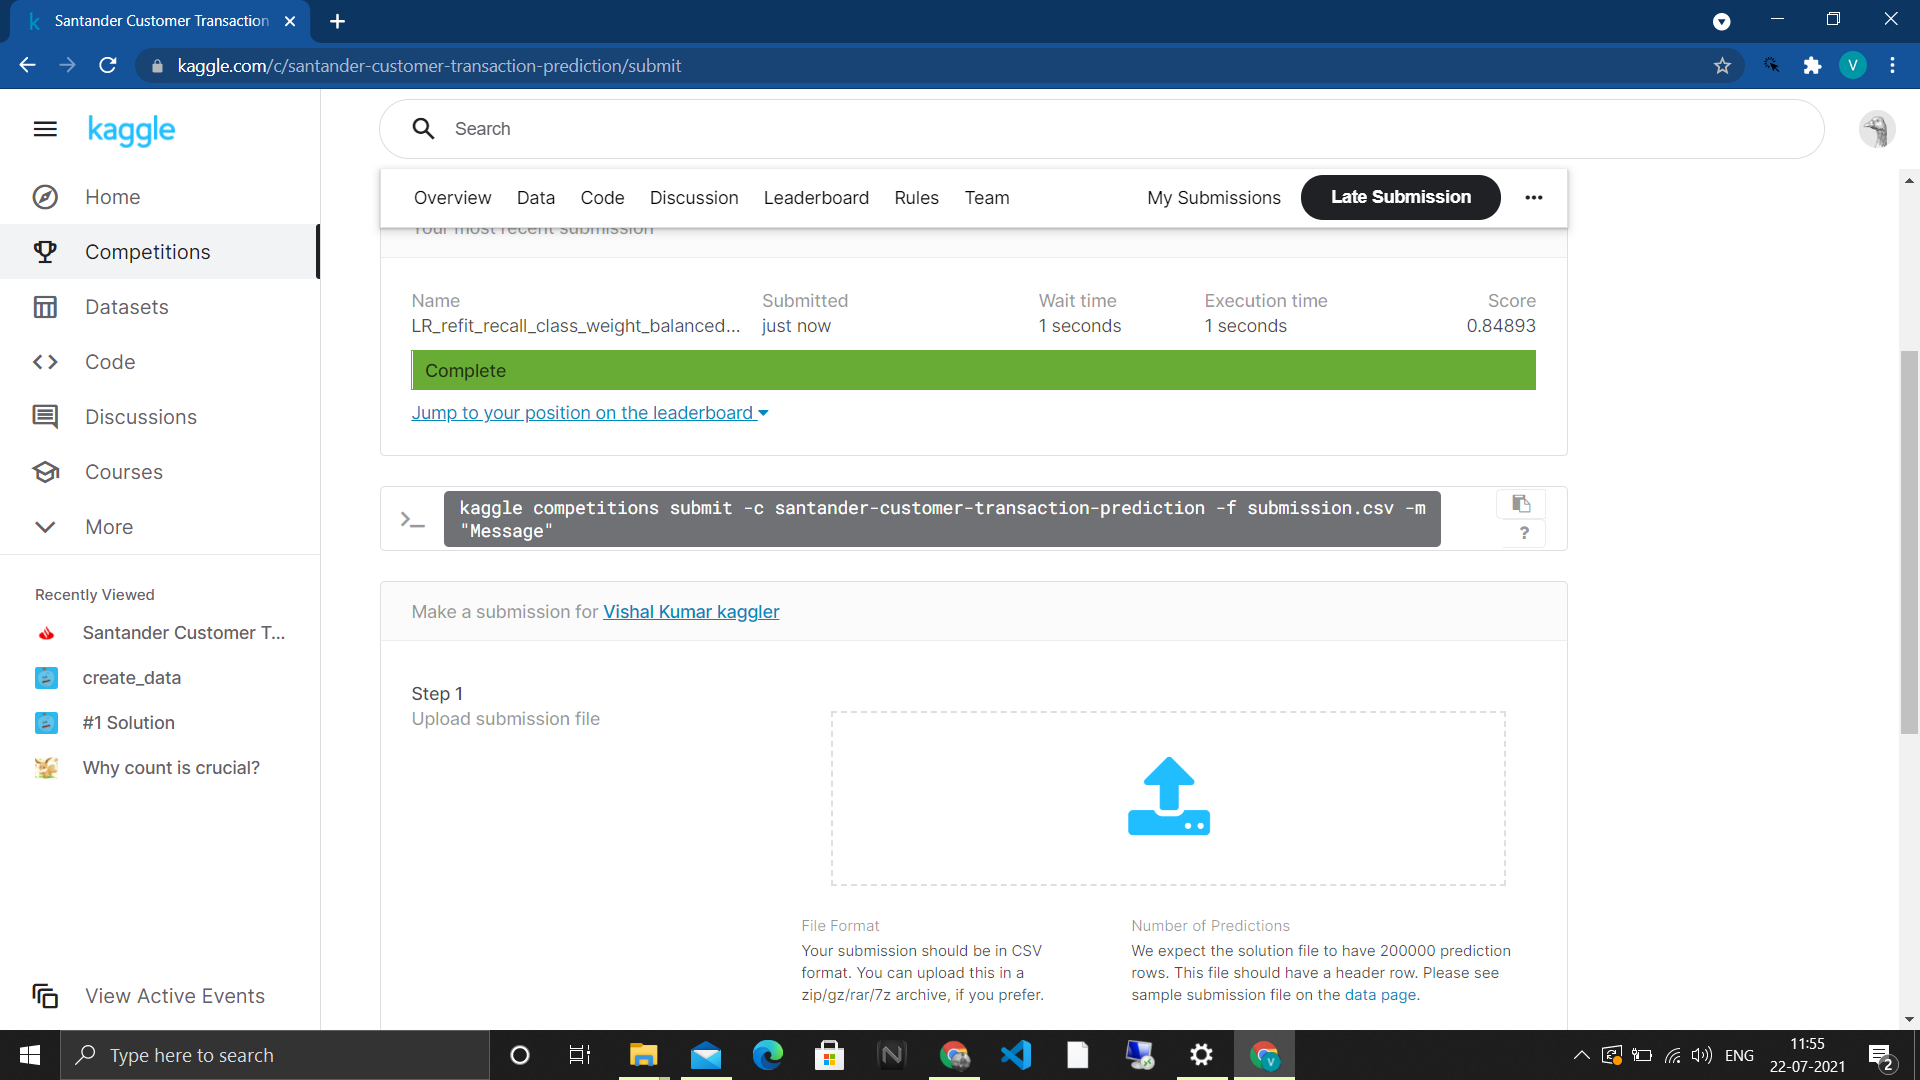

### Conclusion

In [56]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
t = PrettyTable(["Model", "Metric for refit ","class weight before tuning" ,"class_weight after tuning", "AUC","recall","kaggle"])
  
# Add rows
t.add_row(["LR","auc_roc","default","default","0.84745","0.2342","0.85003"])
t.add_row(["LR","auc_roc","default","balanced","0.84896","0.7609","0.84879"])
t.add_row(["LR","auc_roc","balanced","balanced","0.84897","0.7611","0.84879"])
t.add_row(["LR","recall","default","default","0.84896 ","0.2258","0.84879"])
t.add_row(["LR","recall","balanced","balanced","0.84886","0.7636","0.84893"])

In [57]:
print(t)

+-------+-------------------+----------------------------+---------------------------+----------+--------+---------+
| Model | Metric for refit  | class weight before tuning | class_weight after tuning |   AUC    | recall |  kaggle |
+-------+-------------------+----------------------------+---------------------------+----------+--------+---------+
|   LR  |      auc_roc      |          default           |          default          | 0.84745  | 0.2342 | 0.85003 |
|   LR  |      auc_roc      |          default           |          balanced         | 0.84896  | 0.7609 | 0.84879 |
|   LR  |      auc_roc      |          balanced          |          balanced         | 0.84897  | 0.7611 | 0.84879 |
|   LR  |       recall      |          default           |          default          | 0.84896  | 0.2258 | 0.84879 |
|   LR  |       recall      |          balanced          |          balanced         | 0.84886  | 0.7636 | 0.84893 |
+-------+-------------------+----------------------------+------

**Tuned on class weight as none but retraining using class_weight=balanced**

In [58]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
t = PrettyTable(["Model", "Metric for refit", "class_weight used on tuning","class_weight used for  retraining","AUC","recall"])
  
# Add rows
t.add_row(["LR","auc_roc","None","None","0.8474","0.2342"])
t.add_row(["LR","auc_roc","None","balanced","0.8489" ,"0.7609"])
print(t)


+-------+------------------+-----------------------------+-----------------------------------+--------+--------+
| Model | Metric for refit | class_weight used on tuning | class_weight used for  retraining |  AUC   | recall |
+-------+------------------+-----------------------------+-----------------------------------+--------+--------+
|   LR  |     auc_roc      |             None            |                None               | 0.8474 | 0.2342 |
|   LR  |     auc_roc      |             None            |              balanced             | 0.8489 | 0.7609 |
+-------+------------------+-----------------------------+-----------------------------------+--------+--------+


* Tuned using LR using 'auc' as  a refit metrics 
* Then again training using the best tuned parameter but changing the class_weight to 'balanced'.
* Major improvement in recall score and auc score almost the same .